In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
np.set_printoptions(suppress=True)
#%matplotlib inline 

In [14]:
df = pd.read_excel('DHAntnne.xlsx')
df

,DU,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,...,T90,E70,E100,E150,FBP,Residue,Oxstab,Unw Gum,Was gum,Benzene
0,22.70,5.88,1.07,0.63,0.51,0.29,0.12,0,0.00,1.88,...,168.20,31.6,51.1,82.8,193.20,1.0,480,0.5,0.5,0.32
1,10.45,0.35,1.48,0.69,0.52,0.33,0.16,0,0.09,2.63,...,153.95,318.0,52.4,88.8,192.92,0.1,1200,5.7,2.9,0.34
2,11.38,0.34,1.23,0.72,0.53,0.31,0.14,0,0.00,1.20,...,145.60,36.3,57.1,91.0,192.70,0.5,1200,10.4,5.0,0.39
3,4.47,0.32,1.38,0.64,0.48,0.30,0.19,0,0.04,2.52,...,178.90,34.0,50.1,75.4,199.00,0.4,1200,4.8,2.3,0.30
4,11.71,14.75,1.33,0.63,0.49,0.30,0.16,0,0.08,2.12,...,153.40,45.4,64.3,89.0,191.90,1.0,360,0.6,0.5,0.29
5,4.50,0.22,13.33,0.52,0.41,0.23,0.11,0,0.06,2.68,...,164.00,33.7,55.7,83.1,207.70,1.0,360,0.5,0.5,0.28
6,7.40,0.24,0.74,7.03,0.52,0.29,0.19,0,0.02,3.41,...,141.20,33.1,53.6,92.1,188.80,1.0,1200,0.5,0.5,0.40
7,16.00,0.80,1.58,6.85,0.60,0.06,0.08,0,0.00,1.27,...,135.40,41.4,56.2,92.6,186.20,0.4,1200,6.8,0.5,0.15


In [15]:
Y = df.loc[:, 'DU']
Y

0    22.70
1    10.45
2    11.38
3     4.47
4    11.71
5     4.50
6     7.40
7    16.00
Name: DU, dtype: float64

In [16]:
X = df.drop(['DU'], axis=1)
X

,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,Parafine C5,...,T90,E70,E100,E150,FBP,Residue,Oxstab,Unw Gum,Was gum,Benzene
0,5.88,1.07,0.63,0.51,0.29,0.12,0,0.00,1.88,15.10,...,168.20,31.6,51.1,82.8,193.20,1.0,480,0.5,0.5,0.32
1,0.35,1.48,0.69,0.52,0.33,0.16,0,0.09,2.63,9.42,...,153.95,318.0,52.4,88.8,192.92,0.1,1200,5.7,2.9,0.34
2,0.34,1.23,0.72,0.53,0.31,0.14,0,0.00,1.20,12.96,...,145.60,36.3,57.1,91.0,192.70,0.5,1200,10.4,5.0,0.39
3,0.32,1.38,0.64,0.48,0.30,0.19,0,0.04,2.52,10.81,...,178.90,34.0,50.1,75.4,199.00,0.4,1200,4.8,2.3,0.30
4,14.75,1.33,0.63,0.49,0.30,0.16,0,0.08,2.12,8.44,...,153.40,45.4,64.3,89.0,191.90,1.0,360,0.6,0.5,0.29
5,0.22,13.33,0.52,0.41,0.23,0.11,0,0.06,2.68,6.85,...,164.00,33.7,55.7,83.1,207.70,1.0,360,0.5,0.5,0.28
6,0.24,0.74,7.03,0.52,0.29,0.19,0,0.02,3.41,9.37,...,141.20,33.1,53.6,92.1,188.80,1.0,1200,0.5,0.5,0.40
7,0.80,1.58,6.85,0.60,0.06,0.08,0,0.00,1.27,11.31,...,135.40,41.4,56.2,92.6,186.20,0.4,1200,6.8,0.5,0.15


In [5]:
print(df.dtypes)

DU              float64
Naphthene C5    float64
Naphthene C6    float64
Naphthene C7    float64
Naphthene C8    float64
                 ...   
Residue         float64
Oxstab            int64
Unw Gum         float64
Was gum         float64
Benzene         float64
Length: 68, dtype: object


In [17]:
df['Oxstab'] = df['Oxstab'].astype(float)

In [18]:
print(df.dtypes[50:68])

Aromatics C11+     float64
RON                float64
MON                float64
Density at 15°C    float64
DVPE               float64
IBP                float64
T10                float64
T50                float64
T90                float64
E70                float64
E100               float64
E150               float64
FBP                float64
Residue            float64
Oxstab             float64
Unw Gum            float64
Was gum            float64
Benzene            float64
dtype: object


In [19]:
pca=PCA()
df_pca=pca.fit_transform(X=X)

In [20]:
# Store as dataframe and print
df_pca=pd.DataFrame(df_pca)
print(df_pca.shape) 
df_pca.round(2)

(8, 8)


,0,1,2,3,4,5,6,7
0,-666.73,374.00,10.68,-0.88,14.73,-3.14,0.73,0.0
1,4482.36,15.98,0.00,0.01,-0.00,0.01,0.01,0.0
2,-615.81,-344.45,-7.63,0.97,-2.20,-3.80,9.48,0.0
3,-616.35,-343.88,34.65,7.71,-3.47,1.43,-2.10,0.0
4,-679.85,493.42,-17.63,13.15,-3.24,4.16,-0.34,0.0
5,-675.88,493.83,8.45,-12.40,-9.38,-1.48,-0.29,0.0
6,-616.51,-344.56,-9.74,-8.25,3.87,10.36,-0.80,0.0
7,-611.23,-344.34,-18.77,-0.31,-0.31,-7.55,-6.70,0.0


In [21]:
#PCAX=df.loc[:, '0']
#df_pca[:,1]
df_pca[0]

0    -666.733120
1    4482.361603
2    -615.806474
3    -616.353327
4    -679.847089
5    -675.879427
6    -616.509574
7    -611.232592
Name: 0, dtype: float64

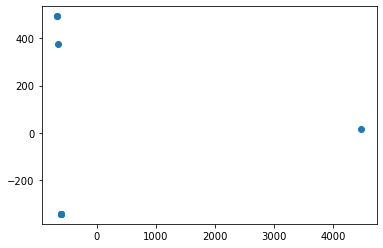

In [22]:
plt.scatter(df_pca[0], df_pca[1])
plt.show()

In [12]:
#plt.scatter(X, Y, c=Y)
PCAX=df.loc[:, 'DU']
PCAY=df.loc[:, 'DU']
plt.scatter(df_pca[:,1], df_pca[:,2], c=y)
plt.show()

InvalidIndexError: (slice(None, None, None), 1)

In [ ]:
from scipy.spatial import ConvexHull 

def encircle(x,y, ax=None, **kw): 
    if not ax: ax=plt.gca()     
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

In [ ]:
 
fig, ax = plt.subplots(1,1, figsize=(4,3))

# Row masks for each category
rows_0 = Y==0;
rows_1 = Y==1; 
rows_2 = Y==2; 

# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='One')
ax.scatter(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], c='green', edgecolor='k', s=120, label='Two')

# Encircle the boundaries
#encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
#encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="green", fc="none", linewidth=2.5)

# Shading
#encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
#encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="k", fc="green", alpha=0.05)

# Labels
ax.set_title("MNIST Data for 1, 2 & 3: Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Transaction Type', fontsize=16)
plt.show();

In [23]:
# Principal Components Weights (Eigenvectors)
#Step 1: Get the Weights (aka, loadings or eigenvectors).
df_pca_loadings=pd.DataFrame(pca.components_)
df_pca_loadings.round(2)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.0,0.0,0.00,-0.00,...,-0.00,0.05,-0.00,0.00,-0.00,-0.00,0.07,0.00,0.00,0.00
1,0.01,0.01,-0.00,-0.00,0.00,-0.00,0.0,0.0,0.00,-0.00,...,0.01,0.01,0.00,-0.00,0.01,0.00,-1.00,-0.01,-0.00,-0.00
2,-0.09,0.05,-0.08,-0.00,0.00,0.00,0.0,0.0,0.01,0.02,...,0.75,-0.17,-0.18,-0.32,0.24,-0.00,0.01,-0.02,0.01,0.00
3,0.41,-0.31,-0.12,0.00,0.00,0.00,0.0,0.0,-0.03,0.06,...,0.33,0.36,0.20,-0.11,-0.25,-0.01,0.01,0.09,0.04,-0.00
4,0.10,-0.34,0.07,0.00,0.00,-0.00,0.0,-0.0,-0.01,0.28,...,0.02,-0.23,-0.25,0.05,-0.48,0.01,-0.01,-0.11,-0.05,0.00
5,0.18,-0.12,0.09,-0.00,0.01,0.01,-0.0,0.0,0.11,-0.21,...,0.06,-0.07,0.05,0.03,-0.04,0.03,0.01,-0.37,-0.07,0.01
6,-0.03,-0.04,-0.33,-0.00,0.01,0.00,-0.0,-0.0,-0.04,0.17,...,0.08,-0.22,0.12,0.13,0.21,0.00,0.00,0.30,0.28,0.01
7,0.74,0.36,-0.04,-0.03,0.01,-0.00,0.0,-0.0,0.00,-0.04,...,-0.10,-0.32,-0.10,-0.01,-0.05,-0.00,0.01,0.05,0.01,-0.00


In [24]:
#Step 2: Compute the mean centered data.
X_mean = X - X.mean()
X_mean.round(2)

,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,Parafine C5,...,T90,E70,E100,E150,FBP,Residue,Oxstab,Unw Gum,Was gum,Benzene
0,3.02,-1.70,-1.58,0.00,0.03,-0.02,0.0,-0.04,-0.33,4.57,...,13.12,-40.09,-3.96,-4.05,-0.85,0.32,-420.0,-3.23,-1.09,0.01
1,-2.51,-1.29,-1.52,0.01,0.07,0.02,0.0,0.05,0.42,-1.11,...,-1.13,246.31,-2.66,1.95,-1.13,-0.58,300.0,1.97,1.31,0.03
2,-2.52,-1.54,-1.49,0.02,0.05,-0.00,0.0,-0.04,-1.01,2.43,...,-9.48,-35.39,2.04,4.15,-1.35,-0.18,300.0,6.68,3.41,0.08
3,-2.54,-1.39,-1.57,-0.03,0.04,0.05,0.0,0.00,0.31,0.28,...,23.82,-37.69,-4.96,-11.45,4.95,-0.28,300.0,1.07,0.71,-0.01
4,11.89,-1.44,-1.58,-0.02,0.04,0.02,0.0,0.04,-0.09,-2.09,...,-1.68,-26.29,9.24,2.15,-2.15,0.32,-540.0,-3.13,-1.09,-0.02
5,-2.64,10.56,-1.69,-0.10,-0.03,-0.03,0.0,0.02,0.47,-3.68,...,8.92,-37.99,0.64,-3.75,13.65,0.32,-540.0,-3.23,-1.09,-0.03
6,-2.62,-2.03,4.82,0.01,0.03,0.05,0.0,-0.02,1.20,-1.16,...,-13.88,-38.59,-1.46,5.25,-5.25,0.32,300.0,-3.23,-1.09,0.09
7,-2.06,-1.19,4.64,0.09,-0.20,-0.06,0.0,-0.04,-0.94,0.78,...,-19.68,-30.29,1.14,5.75,-7.85,-0.28,300.0,3.07,-1.09,-0.16


In [25]:
# Compute PC1 for row 1. 
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :]) 

4482.3616031152105

In [55]:
# Compute PC1 for row 2. 
np.dot(df_pca_loadings.loc[1, :], X_mean.loc[1, :])

15.977472664129435

In [32]:

np.dot(df_pca_loadings.loc[2, :], X_mean.loc[1, :]).round(2) 

0.003938512894848145

In [50]:

np.dot(df_pca_loadings.loc[3, :], X_mean.loc[1, :])

0.010249706596937358

In [51]:
np.dot(df_pca_loadings.loc[4, :], X_mean.loc[1, :])

-0.0036619479602109095

In [52]:
np.dot(df_pca_loadings.loc[5, :], X_mean.loc[1, :])

0.011921299622741799

In [53]:
np.dot(df_pca_loadings.loc[6, :], X_mean.loc[1, :])

0.0053240588196530325

In [54]:
np.dot(df_pca_loadings.loc[7, :], X_mean.loc[1, :])

1.0658141036401503e-14

In [56]:
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[0, :])

-666.7331200281504

In [57]:
np.dot(df_pca_loadings.loc[4, :], X_mean.loc[2, :])

-2.200416566296717

In [58]:
np.dot(df_pca_loadings.loc[2, :], X_mean.loc[5, :])

8.44570840494939

In [59]:
np.dot(df_pca_loadings.loc[2, :], X_mean.loc[4, :])

-17.63143827747149

In [27]:
print(pca.explained_variance_ratio_.round(3)[:10])

[0.954 0.046 0.    0.    0.    0.    0.    0.   ]


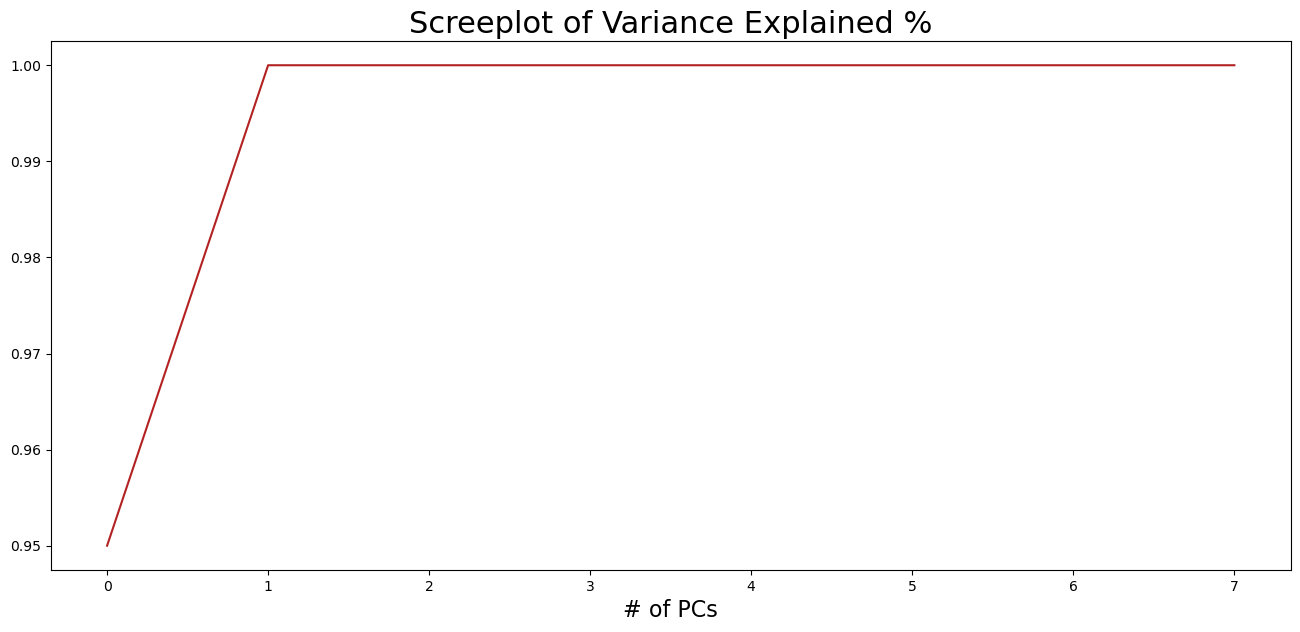

In [28]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

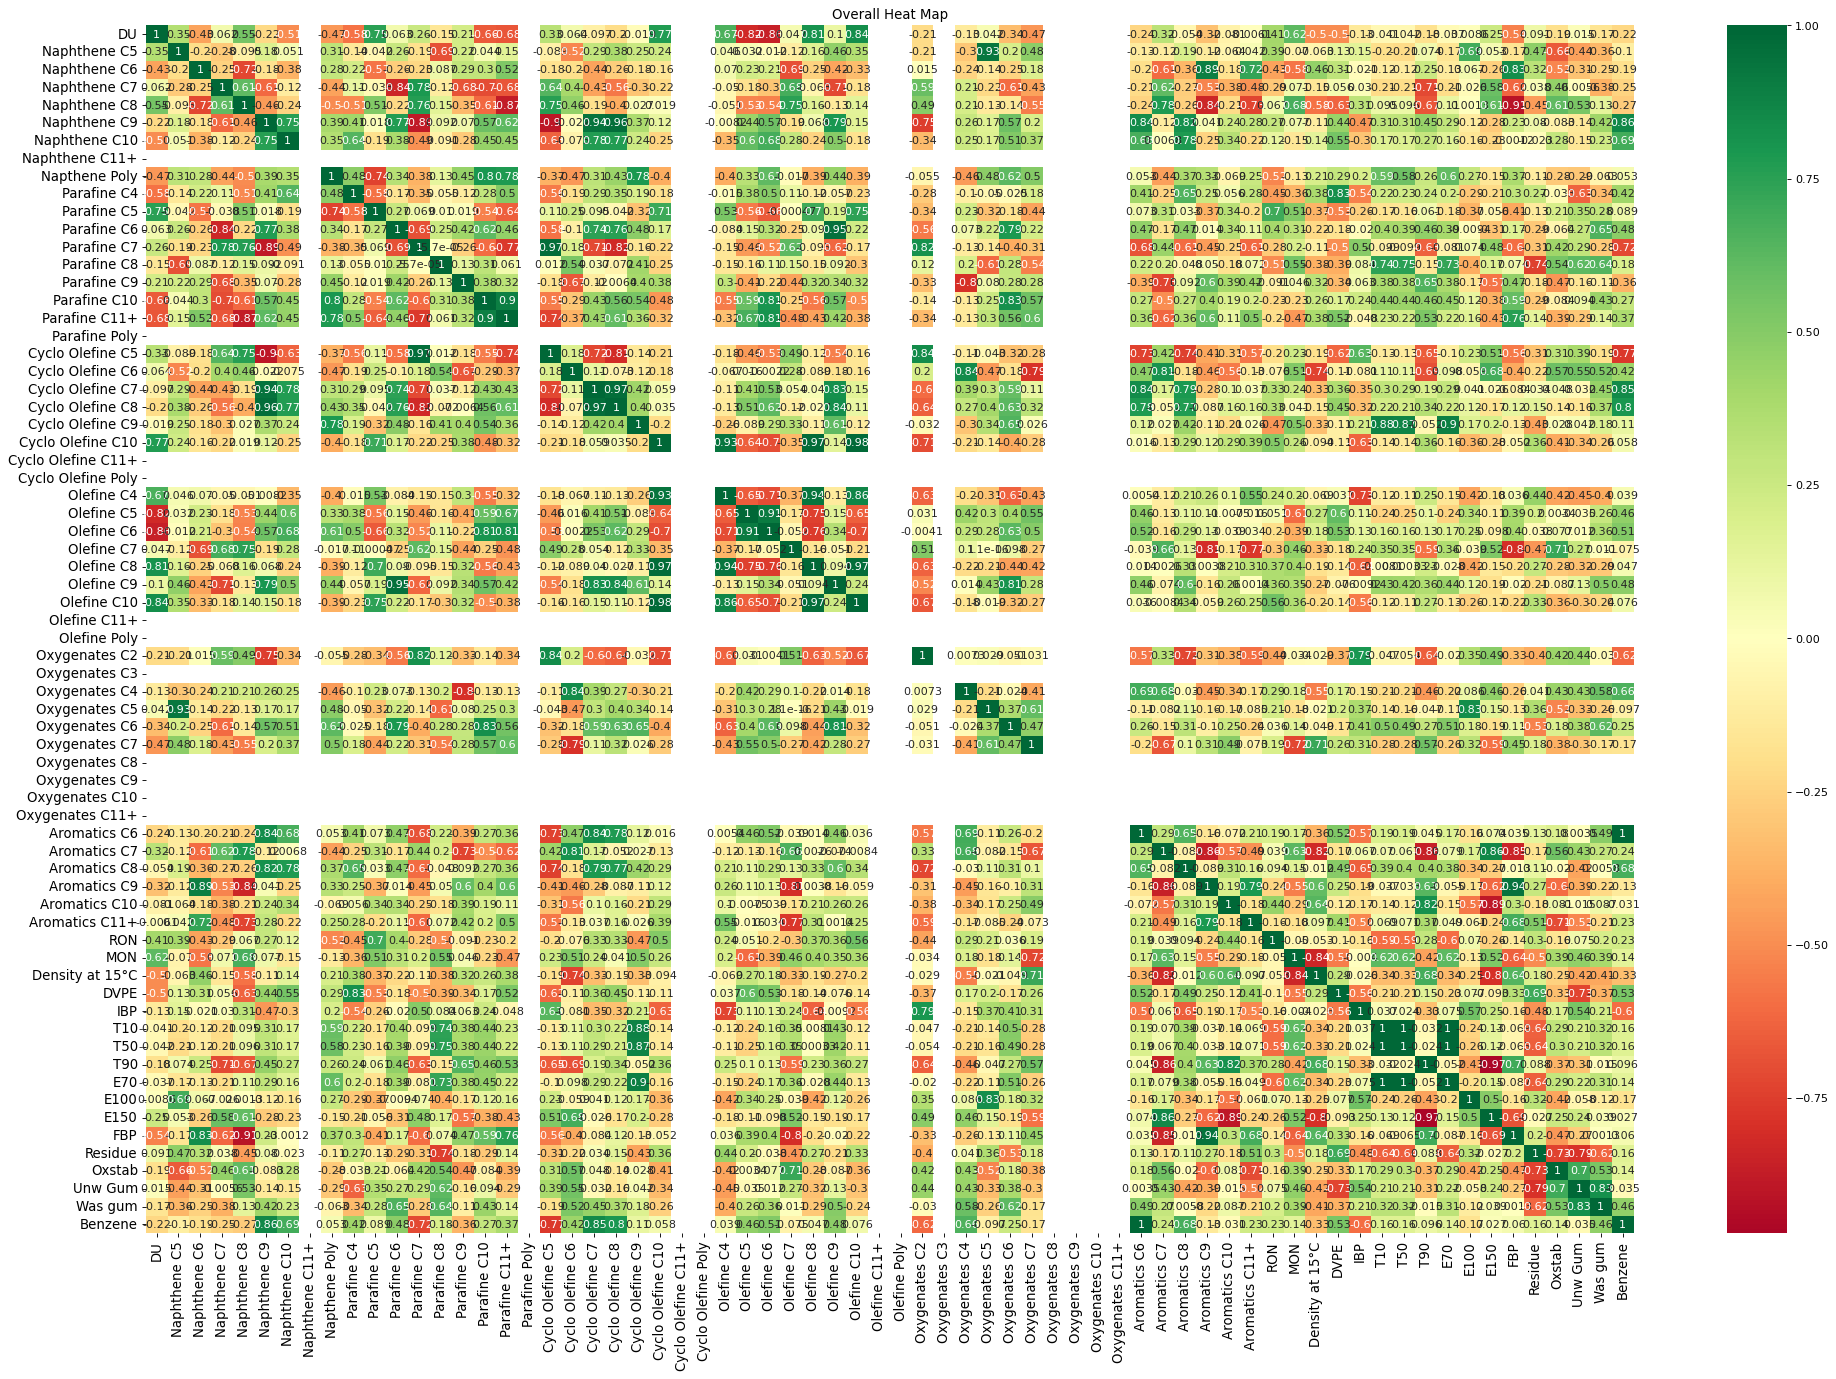

In [29]:
df_pca.round(2) 
plt.figure(figsize=(30,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Overall Heat Map', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('Oheatmap.png', dpi=100) #always before plotting
plt.show()